# homework of week1

## 基本操作

In [4]:
import cv2
import matplotlib.pyplot as plt

def t2s(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.imread("week1_homework.png")


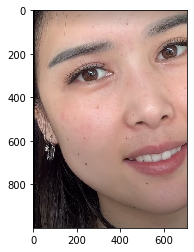

In [5]:
#plt.figure(figsize=(20,20))
plt.imshow(t2s(img))
plt.show()

[[0.1 0.1 0.1]
 [0.1 0.2 0.1]
 [0.1 0.1 0.1]]


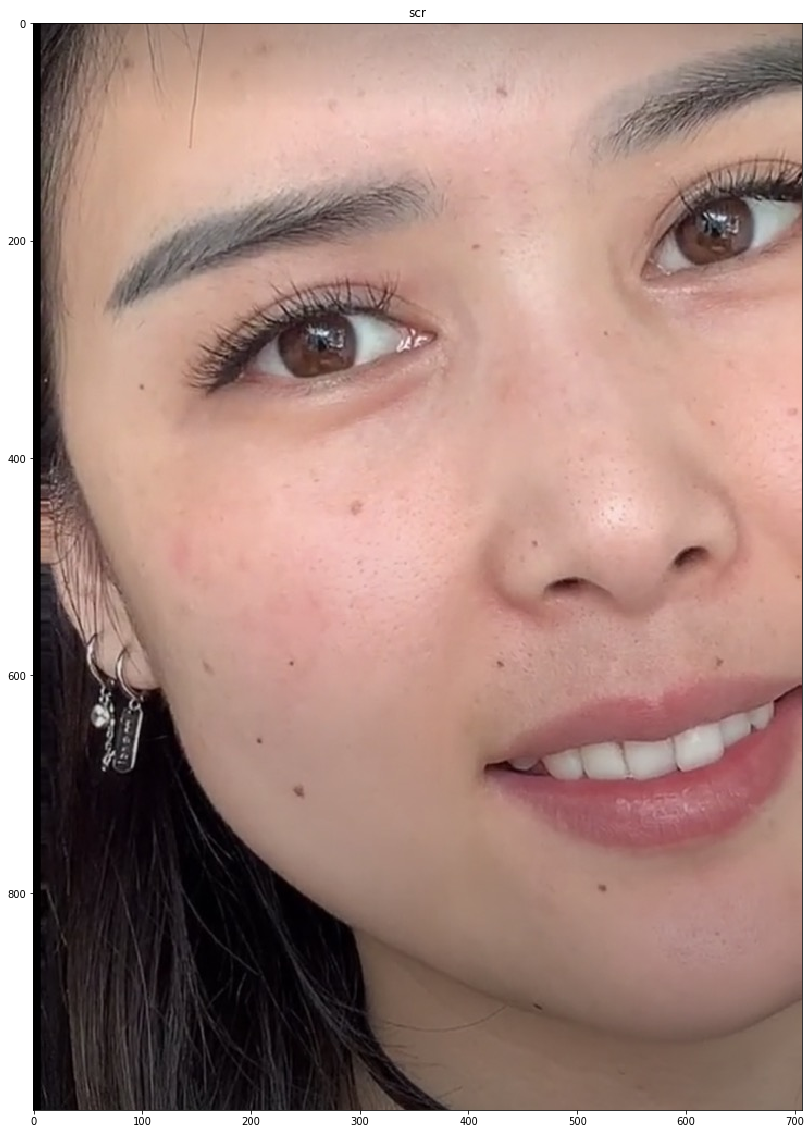

In [3]:
import numpy as np
#构造一个平均核
kernel = np.ones((3,3),np.float32)/8
kernel=-kernel
#kernel[0,:]=[-1,-1,-1]
#kernel[1,:]=[0,0,0]
#kernel[2,:]=[1,1,1]

kernel[0,:]=[0.1,0.1,0.1]
kernel[1,:]=[0.1,0.2,0.1]
kernel[2,:]=[0.1,0.1,0.1]




print(kernel)
plt.figure(figsize=(20,20))
plt.title("scr")
plt.imshow(t2s(img))
plt.show()





(1000, 707, 3)
[2 0 0]


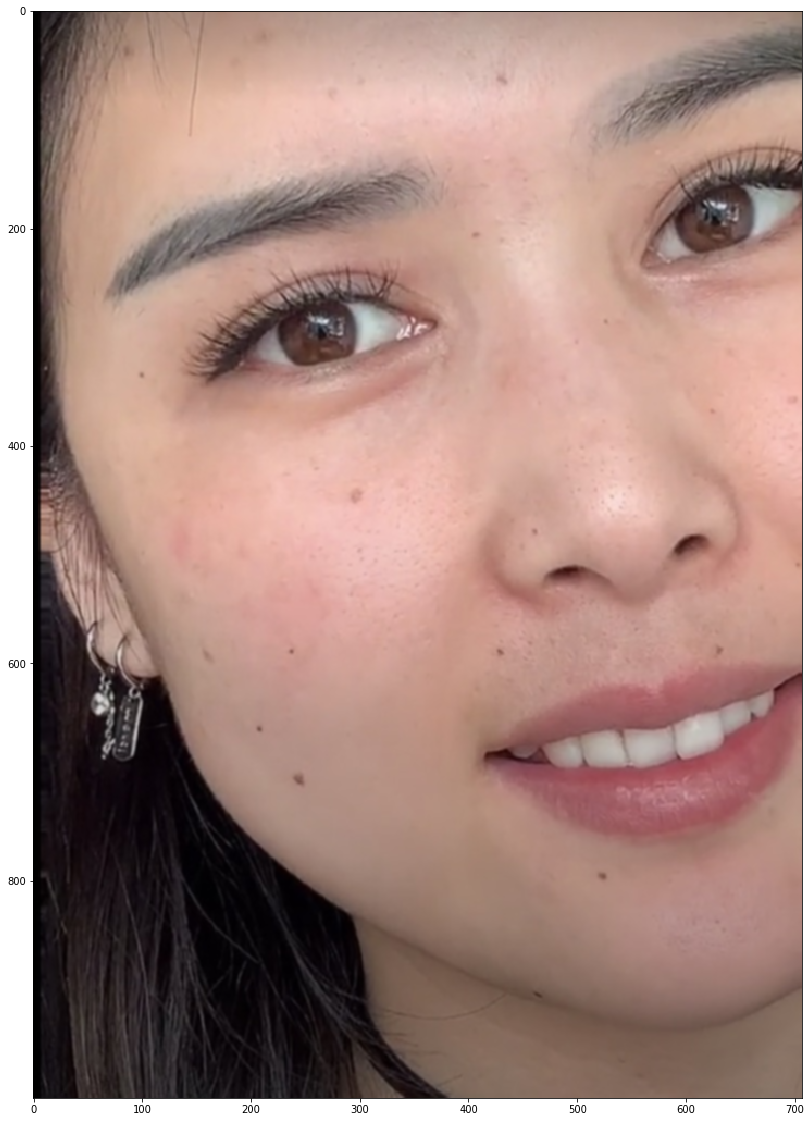

In [30]:


#dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])；当ddepth=-1时，表示输出图像与原图像有相同的深度。
print(img.shape)
result = cv2.filter2D(img,-1,kernel)
result.shape
print(result[0,0])
plt.figure(figsize=(20,20))
plt.imshow(t2s(result))
plt.show()

## 看不出明显效果，更大滤波核，更多次滤波

In [67]:
kernel = np.ones((99,99),np.float32)/(99*99)


img1 = cv2.filter2D(img,-1,kernel)
rmg1 = cv2.filter2D(img1,-1,kernel)
rmg1 = cv2.filter2D(img1,-1,kernel)
rmg1 = cv2.filter2D(img1,-1,kernel)
rmg1 = cv2.filter2D(img1,-1,kernel)
result = cv2.filter2D(img1,-1,kernel)

### 显示滤波前后对比图

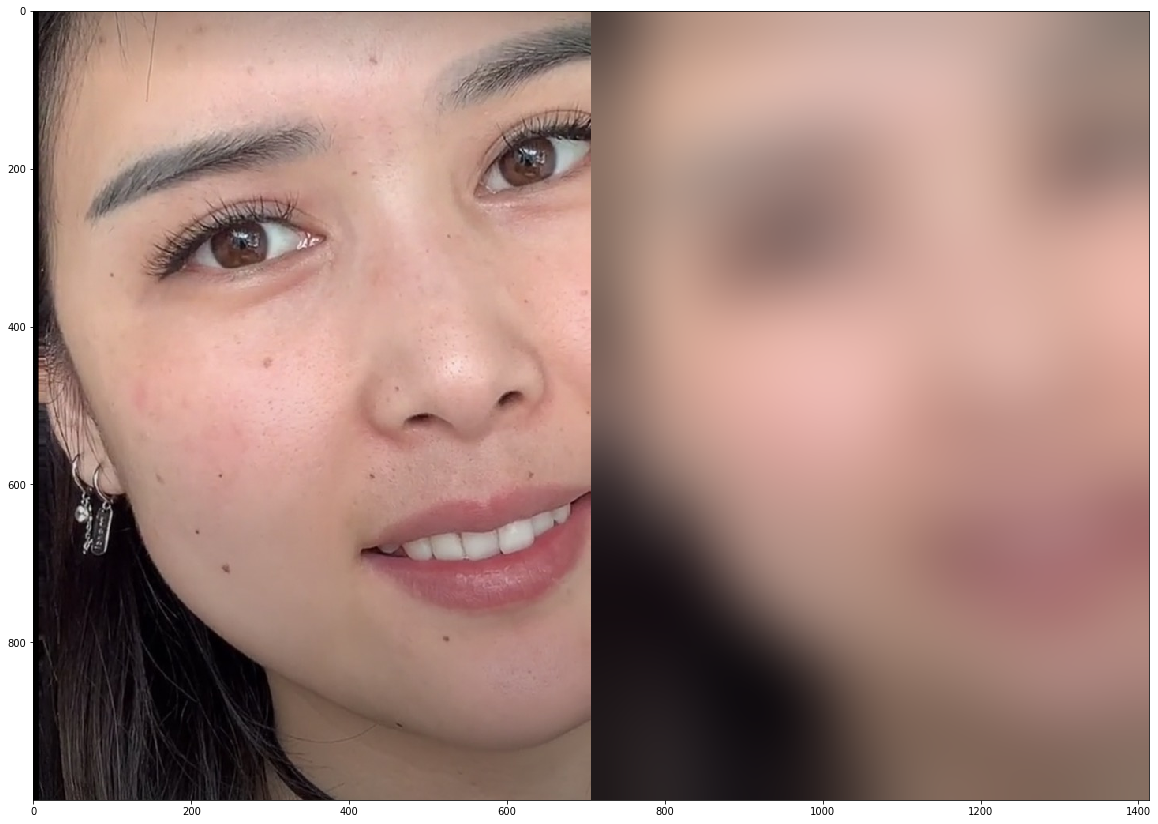

In [68]:
plt.figure(figsize=(20,20))
plt.imshow(t2s(cv2.hconcat([img,result])))
plt.show()

### 只对肤色区域进行滤波

In [69]:
result_show=result.copy()
# 肤色检测
# 来源 https://www.cnblogs.com/demodashi/p/9437559.html
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 把图像转换到HSV色域
(_h, _s, _v) = cv2.split(hsv) # 图像分割, 分别获取h, s, v 通道分量图像
skin3 = np.zeros(_h.shape, dtype=np.uint8)  # 根据源图像的大小创建一个全0的矩阵,用于保存图像数据
(x, y) = _h.shape # 获取源图像数据的长和宽

# 遍历图像, 判断HSV通道的数值, 如果在指定范围中, 则置把新图像的点设为255,否则设为0
for i in  range(0, x):
    for j in  range(0, y):
        if (_h[i][j] >  5) and (_h[i][j] <  70) and (_s[i][j] >  18) and (_s[i][j] <  255) and (_v[i][j] >  50) and (_v[i][j] <  255):
            skin3[i][j] =  255
            #result[i][j]=img[i][j]
        else:
            skin3[i][j] =  0
            result_show[i][j]=img[i][j]

#cv2.imshow(imname, img)
#cv2.imshow(imname +  " Skin3 HSV", skin3)
cv2.imwrite("skin.png",skin3)
import os
os.system("open skin.png")
cv2.imwrite("compare2.png",cv2.hconcat([img,result_show]))
os.system("open compare2.png")

32512

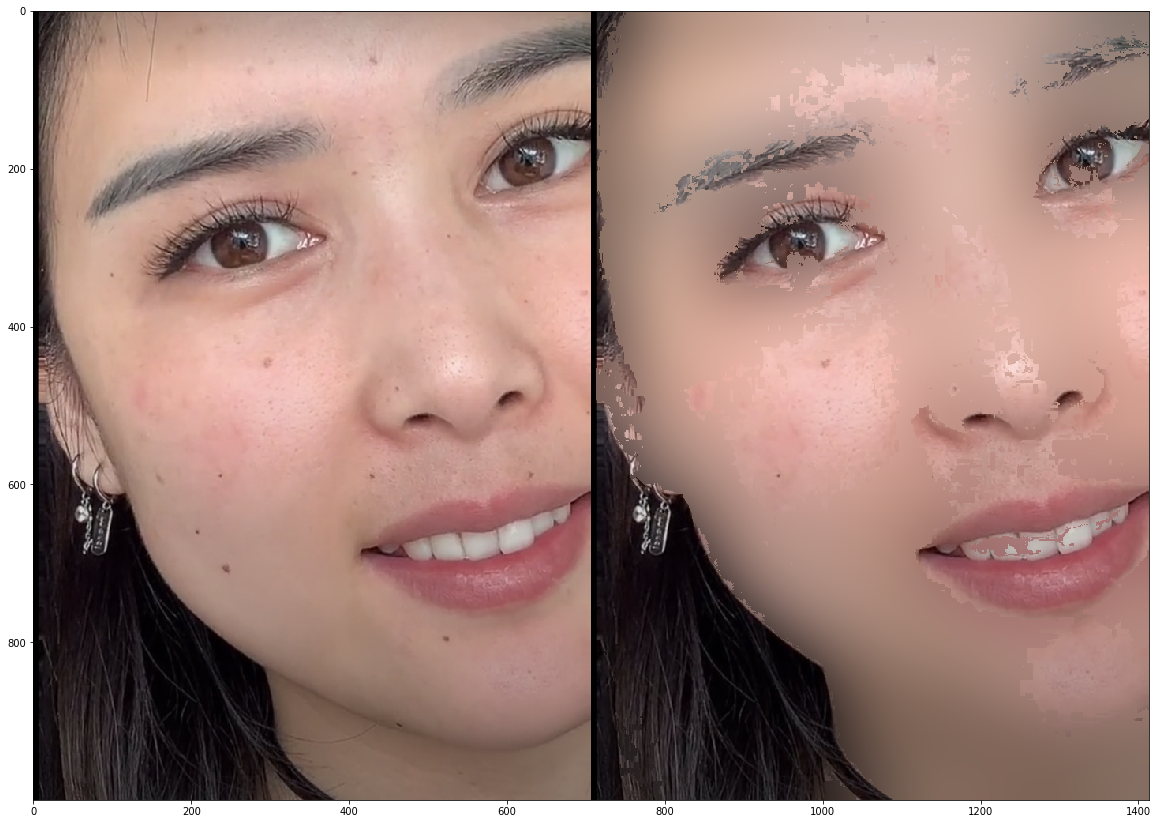

In [71]:
plt.figure(figsize=(20,20))
plt.imshow(t2s(cv2.hconcat([img,result_show])))
plt.show()

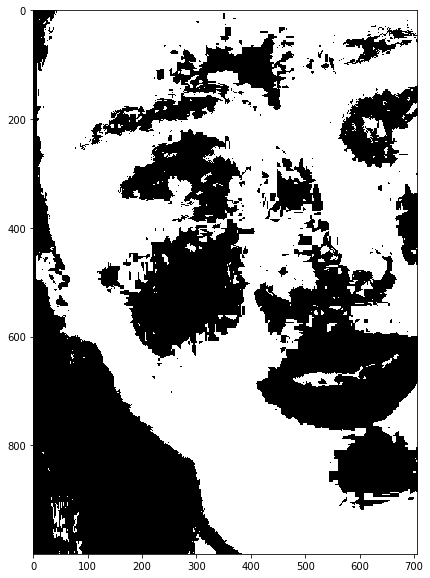

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(t2s(skin3))
plt.show()

## 如何准确的到人脸五官区域？

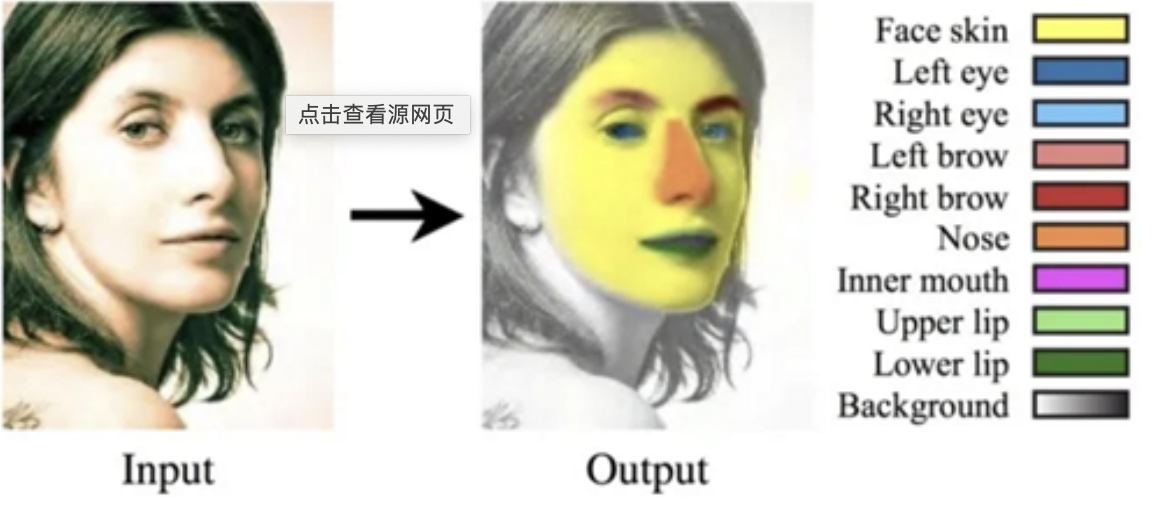

## 依赖人脸关键点

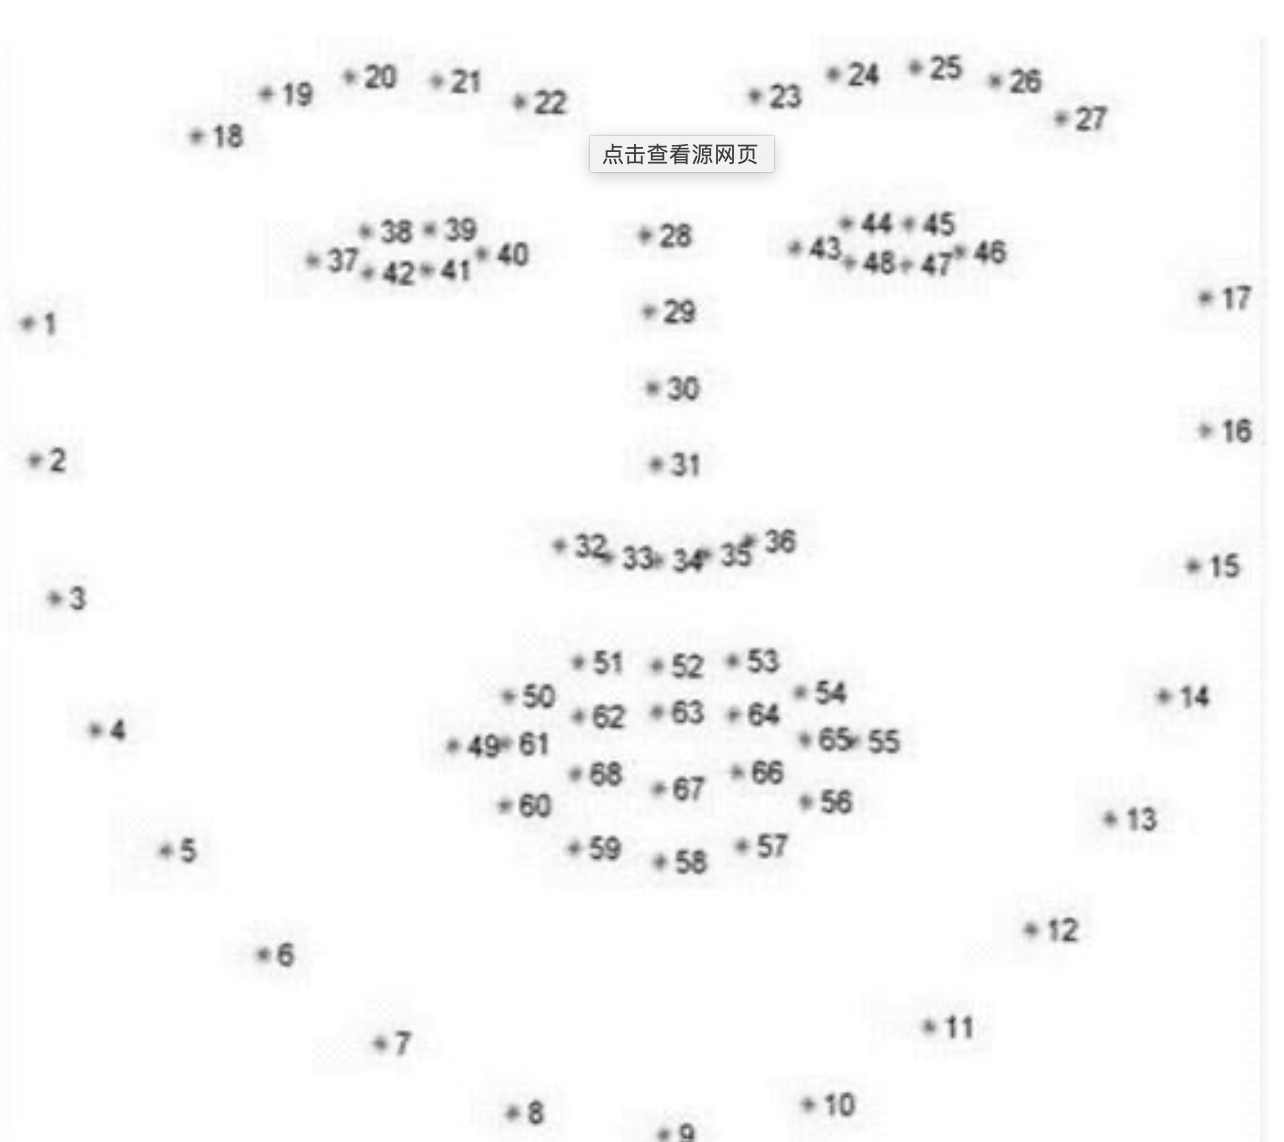